<a href="https://colab.research.google.com/github/1tengji1/ENGG2740/blob/main/ENGG2740Class1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Python
You will need to have a version of Python installed (hopefully a new version like 3.9 and above). You will also need to have some of the standard Python libraries installed, either via 'pip install ...' or via a conda environment. Libraries that you will need for this class include: numpy, scipy, matplotlib. 

For folks who are used to matlab, note that Python starts with the zero index while Matlab starts with index 1.

Reference

- [Professor Steve Bruton @ U of Washington YouTube class](https://www.youtube.com/@Eigensteve)
- [ME 564 - Mechanical Engineering Analysis](http://faculty.washington.edu/sbrunton/me564/)

In [72]:
# Basic Operations 
# -- similar to many basic programming languages (C, etc.)

# use the python function 'print' to print the output
print(2 + 2)
print(2 * 2)
print(2 / 2)
print(2 - 2 * 7)  # Order of operations matters
print((2 - 2) * 7)

4
4
1.0
-12
0


#### Notice a big difference with C or Matlab -- no semicolons needed at the end of statements! However, we will need colon symbols for indicating an indented block (see the loops below)

In [73]:
# Assign variables using '=' symbol
a = 2 + 2
print(a)

4


In [74]:
# Loops
count = 0  # Initialize the variable "count"

# Add all the numbers 1-10
for ii in range(10):  # note that range(10) = [0, 2, ..., 9]
    count = ii + count  # indicate a code block to loop over by indenting the code lines
    
print(count)

45


In [75]:
counter = count  # Assign count to counter

# Subtract numbers until count is not greater than 10
while (counter > 10):
    counter = counter - 1
print(counter)

10


In [76]:
# Create a vector (this is also called an 'array')
A_Vector = [1, 2, 3, 4]

# Access a particular element of the vector
print(A_Vector[2])  # prints 3 because A_vector[0] is the start of the vector!
print(A_Vector[-2]) # prints 3 because A_vector[-1] is the end of the vector, i.e. we are counting backwards from the end

# best way to work with vectors and multi-dimensional 'arrays'
# is to use the NumPy library, which is imported as follows:
import numpy as np  # call the numpy library np for shorthand
# Note: Numpy is one of the most fundamental package for scientific computing with Python, 
# Its official website is https://numpy.org
B_Vector = np.ones(4)  # same as B_Vector = [1, 1, 1, 1]
A_Vector = np.array([1, 2, 3, 4])

# np.zeros(N)  -- make a vector of N elements, all initialized to 0
# np.random.randn(N)  -- make a vector of N elements, all randomly initialized between (0, 1)
# np.eye(N)  -- make the identity matrix of size N x N

# Create a numpy-style Matrix

A_Matrix = np.array([[1, 2, 3, 4],
                        [5, 6, 7, 8]])

# Matrices are like stacks of vectors so [], zeros, ones, eye.. all work to
# create matrices as well.

# np.zeros((N, N, N)) -- Make a N x N x N tensor with elements all initialized to 0 

3
3


In [77]:
# Operations on Vectors/Matrices

# matrices and vectors have to have one matching 
# dimension to be multiplied together
mat_vec_product = A_Matrix @ A_Vector 

# The dimension of numpy objects can be accessed by .shape and
# the .T operator takes the transpose (NxM to MxN)
print(mat_vec_product, A_Matrix.shape, A_Matrix.T.shape)

# square every element in the matrix A. Note that this is different than doing A @ A
elementwise_square = A_Matrix ** 2 

# can print multiple things by separating with a comma in the print function
print('A = ', A_Matrix)
print('A^2 = ', elementwise_square)

[30 70] (2, 4) (4, 2)
A =  [[1 2 3 4]
 [5 6 7 8]]
A^2 =  [[ 1  4  9 16]
 [25 36 49 64]]


In [78]:
# Create a function in Python 
# Time, and fuctions of time f(t) are represented by vectors 

# numpy.linspace(-100, 100, 200) generates a 200-dimensional vector by splitting up the
# interval (-100, 100) into a uniform grid. Default is to omit the last point (t=100)
the_time = np.linspace(-100, 100, 200) 

F1 = (the_time ** 2) * np.sin(the_time)  # defining t^2 * sin(t)
F2 = (the_time ** 2)  # defining t^2

In [79]:
# For plotting, we need to import another standard python library
from matplotlib import pyplot as plt
# matplotlib library is a comprehensive library for creating static, animated, 
# and interactive visualizations in Python.
# The official website is https://matplotlib.org

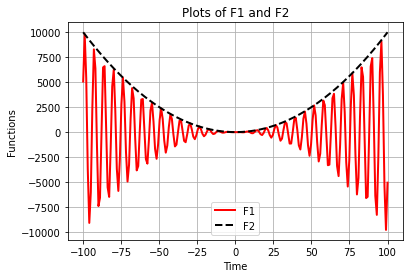

In [80]:
plt.figure()
plt.plot(the_time, F1, 'r-', linewidth=2)   # Plots F1(t) in a red solid line
plt.plot(the_time, F2, 'k--', linewidth=2)  # Plots F2(t) in a black dashed line
plt.xlabel('Time')           # Adds the label "time" to the x-axis
plt.ylabel('Functions')      # Adds the label "functions" to the y-axis
plt.legend(['F1','F2'])      # Creates a legend with entries "F1", "F2"
plt.grid(True)               # Turns on the grid lines 
plt.title('Plots of F1 and F2')  # Gives the plot a title
plt.show()  # actually show the plot (more important when not using a Jupyter notebook)

In [81]:
# Linear System Solving (2 equations + 2 unknowns) 

# Imagine we have the following 2 algebraic equations
# z  + 2y = 1
# 4z + 5y = 1

A = np.array([[1, 2], [4, 5]])
b = np.array([1, 1])

# The following will solve Ax = b in a least-squares sense (if an exact solution doesn't exist)
# Note that this is usually what A\b does in matlab

#  if function returns a bunch of stuff, and you don't care about that stuff, use a _
x, _, _, _ = np.linalg.lstsq(A, b) 
print('Ax - b = ', A @ x - b)

# Even for very large system

AA = np.random.randn(100, 100)
bb = np.random.randn(100)

xx, _, _, _ = np.linalg.lstsq(AA, bb)  
print('sum(AAxx - bb) = ', np.sum(AA @ xx - bb))  # get like 1e-14, pretty close to zero

# You might get a FutureWarning here -- this is letting you know something
# might be off in the lstsq function -- in this case it is fine

Ax - b =  [0. 0.]
sum(AAxx - bb) =  6.147166109471414e-14


<ipython-input-81-f32bcafc0812>:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x, _, _, _ = np.linalg.lstsq(A, b)
<ipython-input-81-f32bcafc0812>:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  xx, _, _, _ = np.linalg.lstsq(AA, bb)


The following code illustrates using solve_ivp package in scipy.integrate to solve ode equations.
For example, assume a dynamic system, whose parameters are position $x$ and velocity $v$. The odes can be written into:

\begin{matrix}
\frac{\mathrm{d} x}{\mathrm{d} t} = v
 \\
\frac{\mathrm{d} v}{\mathrm{d} t} = -\lambda x-\zeta v
\end{matrix}

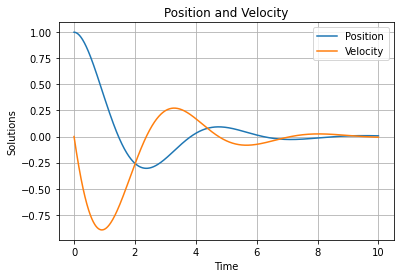

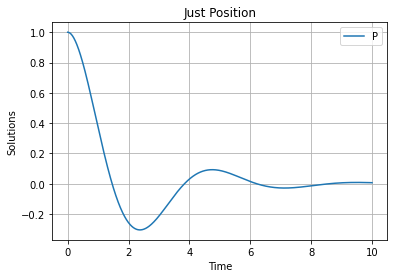

In [82]:
# Ordinary Differential Equations (ODE)
from scipy.integrate import solve_ivp  # import the standard ODE solver in Python
# The function solve_ivp is a classic function from scipy for solving initial value problem for a system of ODEs.
# The official website is https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html
# It integrates many different ode solving methods, including Runge-Kutta method of order 5(4), Runge-Kutta method of order 3(2), Runge-Kutta method of order 8
# Runge-Kutta method of the Radau IIA family of order 5, multi-step variable-order method based on a backward differentiation formula for the derivative approximation.
# and Adams/BDF method with automatic stiffness detection and switching.
TSpan = [0, 10]     # Initial Time and Final Time
t = np.linspace(0, 10, 1000)
X_initial = [1, 0]  # Initial Conditions initial position x = 1, initial velocity v = 0

# solve_ivp wants a true function with arguments -- good time to show how to do that:
# define a function that takes t and X0 as arguments, and returns 
def ode_test(t, X0): 
    X = np.zeros(2)
    lam = 2
    zeta = 1
    X[0] = X0[1]
    X[1] = - lam * X0[0] - zeta * X0[1]
    return X

# Now that we have defined a function that we want to call, solve the ODE
# Calls the function ode_test at each time step and solves for new state
# given initial state then repeats at every time step.
ode_test_solution = solve_ivp(ode_test, TSpan, X_initial, t_eval=t)
T_out = t
Y_out = ode_test_solution.y.T  # transpose the solution for indexing later

plt.figure()
plt.plot(T_out, Y_out)
plt.xlabel('Time')
plt.ylabel('Solutions')
plt.legend(['Position', 'Velocity'])
plt.title('Position and Velocity')
plt.grid(True)

plt.figure()
plt.plot(T_out, Y_out[:, 0])  # The ":" here takes all elements in the rows 
                              # associated with the first column. This is called
                              # index slicing and it is incredibly useful.
plt.xlabel('Time')
plt.ylabel('Solutions')
plt.legend('Position')
plt.title('Just Position')
plt.grid(True)


# Real world problem cases
Now, aftering basic learning of basic libraries in Python, we will introduce several real world problem cases to help you better understand how to solve differential equations with Python.
# Ball-Free-Fall
Here we introduce a classic model, free fall problem, like a ball falls down from certain height H, during the falling procedure, it will suffer from Gravity, proportional to the mass of the ball, and resistance, proportional to the velocity of the ball. (As shown in the figure below)


Assume the mass of the ball is m, gravity acceleration is g, air resistance coefficient is k.
Mathematical derivation:
According to Newton's second law, (F is the total force added on the object, a is the acceleration of the object, x is the position of the object, details can be seen on slides page 17)
\begin{matrix}
F = ma
 \\
 \frac{\mathrm{d} x}{\mathrm{d} t} = v
 \\
m\frac{\mathrm{d}^{2} x}{\mathrm{d} t^2} = -mg-k\frac{\mathrm{d} x}{\mathrm{d} t} (\frac{\mathrm{d}^{2} x}{\mathrm{d} t^2} = -g-\zeta\frac{\mathrm{d} x}{\mathrm{d} t})
\end{matrix}
Define parameter $\zeta=\frac{k}{m}$. After constructing the above odes, we will start to use previous Python libraries to solve them, the solving method is Forth-order Runge-Kutta, you could also choose other solving methods and see the difference between them.


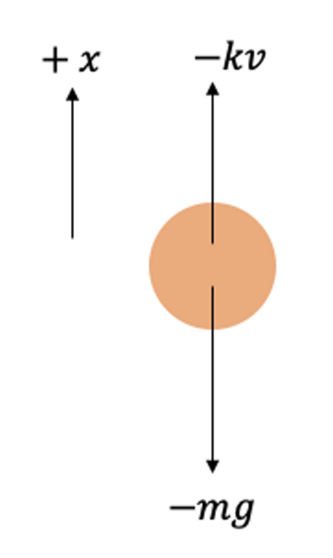

In [83]:
import cv2  # cv2 is a basic library to read figure files https://pypi.org/project/opencv-python/
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("/content/drive/MyDrive/ENGG2740/Class1File/freefall.png")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
#plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()

# Step 1 Import Python packages and define basic parameters
For simplicity we only use the parameter $\zeta$ to define the ratio between m and k.

In [84]:
# The first step is to import python packages and define basic parameters, for simplicity, 

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
zeta = 0.5  # Define the parameter mentioned above

# Step 2 Transform the odes into matrix version, then into codes

Given equations
\begin{matrix}
 \frac{\mathrm{d} x}{\mathrm{d} t} = v
 \\
 \frac{\mathrm{d}^{2} x}{\mathrm{d} t^2} = -g-\zeta\frac{\mathrm{d} x}{\mathrm{d} t}
\end{matrix}
Define
\begin{equation}
x=\begin{bmatrix}
x
 \\
v
\end{bmatrix}
\end{equation}
Initial condition
\begin{equation}
x_{0}=\begin{bmatrix}
x(0)
 \\
v(0)
\end{bmatrix}
\end{equation}
Matrix version ode
\begin{equation}
\frac{\mathrm{d} }{\mathrm{d} t} \begin{bmatrix}
x
 \\
v
\end{bmatrix}=\begin{bmatrix}
 0 & 1\\
 0 &-\zeta
\end{bmatrix}\begin{bmatrix}
x
 \\
v
\end{bmatrix}+\begin{bmatrix} 0 \\ -g \end{bmatrix}
\end{equation}

In [85]:
# The second step is to transform the odes into codes, this step needs preliminary knowdledge of linear algebra.

# Define linear free fall system
A = np.array([[0, 1], [0, -zeta]])  # \dot{x} = Ax
B = np.array([0, -9.8])
dt = 0.01  # time step
T = 10     # amount of time to integrate

x0 = [100, 40]  # initial condition (x=100 means the initial height is 100m, 
#v=40 means initial velocity is 40m/s and its direction is up, if the velocity is negative, that means its direction is down)
num_time_slices = int(T / dt)
time_slices = np.linspace(0, T, num_time_slices)  # times slices illustrates iteration times 

# Step 3 Define ode functions and solving the ode functions

In [86]:
# defining a function for the right-hand side of the ODE
# which scipy wants in case the ODE depends explicitly on t
def ode_func(t, x):
    c = A @ x
    c = c + B
    return c

# evaluate ODE function between (0, T) with initial condition x0
# and return the solution at the times specified by t_eval
ivp_solution = solve_ivp(ode_func, (0, T), x0, method='RK45', t_eval=time_slices)
xRK4 = ivp_solution.y

# Step 4 Plot the figure of height and velocity

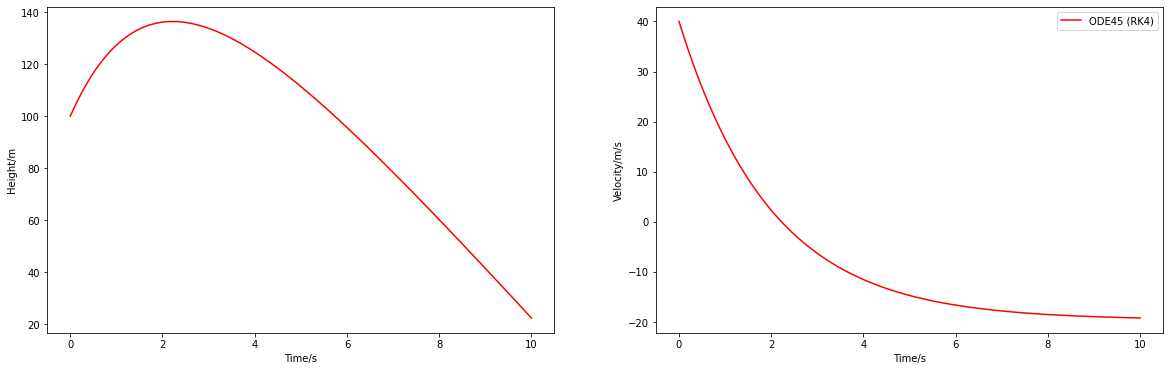

In [87]:
plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(time_slices, xRK4[0, :], 'r')
plt.xlabel('Time/s')
plt.ylabel('Height/m')
plt.subplot(1, 2, 2)
plt.plot(time_slices, xRK4[1, :], 'r')
plt.xlabel('Time/s')
plt.ylabel('Velocity/m/s')
plt.legend(['ODE45 (RK4)'])
plt.show()

# Population prediction the logistic equation

The next example here we will show is population, which can be characterized with logistic equation.

\begin{equation}
\frac{\mathrm{d} x}{\mathrm{d} t} = x(1-x)
\end{equation}
Given initial condition x(0) = $x_{0}>0$.

# Step 1 Import Python packages and define basic parameters

In [88]:
# The first step is to import python packages and define basic parameters, for simplicity, 

import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# Step 2 Transform the odes into codes (For this example, we don't need to transform the ode into matrix, because we can dicretly write the ode function)

In [89]:
# The second step is to transform the odes into codes, this step needs preliminary knowdledge of linear algebra.
dt = 0.01  # time step
T = 10     # amount of time to integrate

x0 = [0.01]  # initial condition (x=1 means the initial condition is 1)
num_time_slices = int(T / dt)
time_slices = np.linspace(0, T, num_time_slices)  # times slices illustrates iteration times 

# Step 3 Define ode functions and solving the ode functions

In [90]:
# defining a function for the right-hand side of the ODE
# which scipy wants in case the ODE depends explicitly on t
#----------------------------------Test Part (Now it is your turn to write the ode equation and try solving the equation)----------------------------------------
def ode_func(t, x):
    c = x*(1-x)
    return c
# Answer code
#----------------------------------------------------------------------------------------------------------------------------------------------------------------
# evaluate ODE function between (0, T) with initial condition x0
# and return the solution at the times specified by t_eval
ivp_solution = solve_ivp(ode_func, (0, T), x0, method='RK45', t_eval=time_slices)
xRK4 = ivp_solution.y

# Step 4 Plot the figure of height and velocity

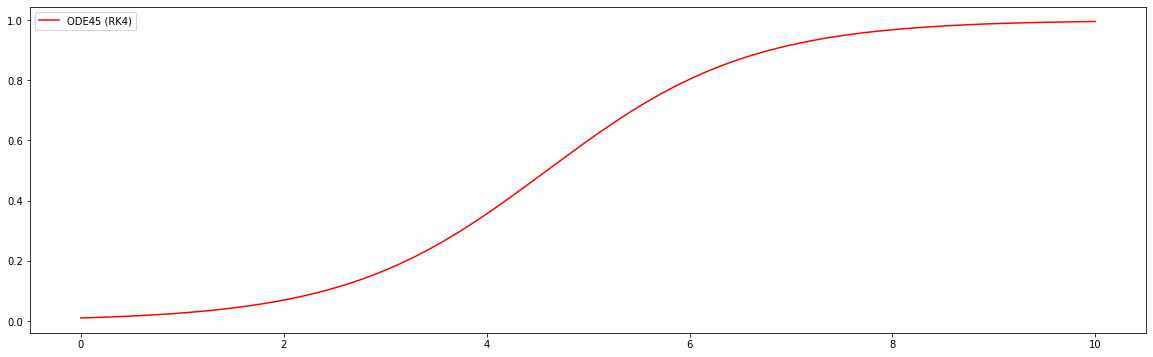

In [91]:
plt.figure(figsize=(20,6))
plt.plot(time_slices, xRK4[0, :], 'r')
plt.legend(['ODE45 (RK4)'])
plt.show()